1. General Salary Data:
• Start by plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

0       True
1      False
2      False
3       True
4      False
       ...  
576    False
577    False
578    False
579    False
580     True
Name: experience_level, Length: 581, dtype: bool


Text(0.5, 1.0, 'Work Year and Avg Salary')

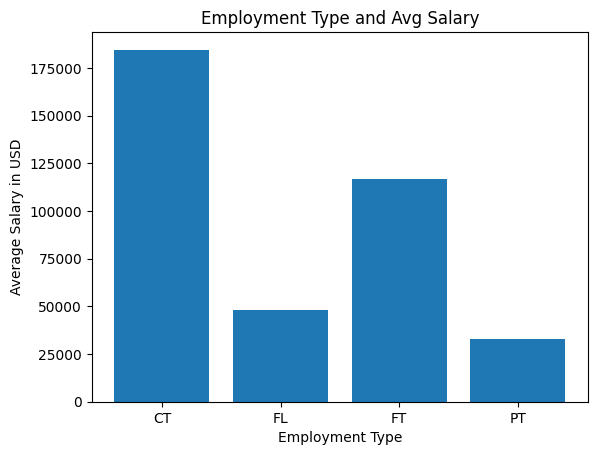

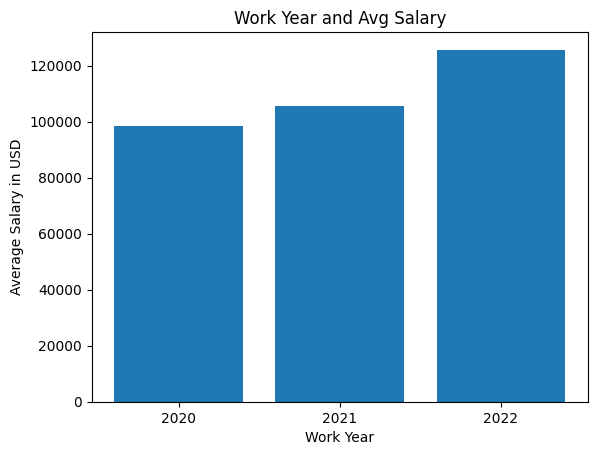

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://richardson.byu.edu/220/ds_salary.csv'
df = pd.read_csv(url)

mi = (df['experience_level'] == 'MI') == True
print(mi)


mean_salary = df.groupby('employment_type')['salary_in_usd'].mean()
plt.bar(mean_salary.index, mean_salary.values)

plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.title('Employment Type and Avg Salary')

mean_salary_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure()
plt.bar(mean_salary_year.index, mean_salary_year.values)
plt.xticks(ticks=df['work_year'].unique(), labels=df['work_year'].unique())
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.title('Work Year and Avg Salary')



2. Effect of Experience on Salary:
• Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.

  experience_level  salary_in_usd
0               EN   65249.812500
1               EX  204206.160000
2               MI   91077.527363
3               SE  140119.658182


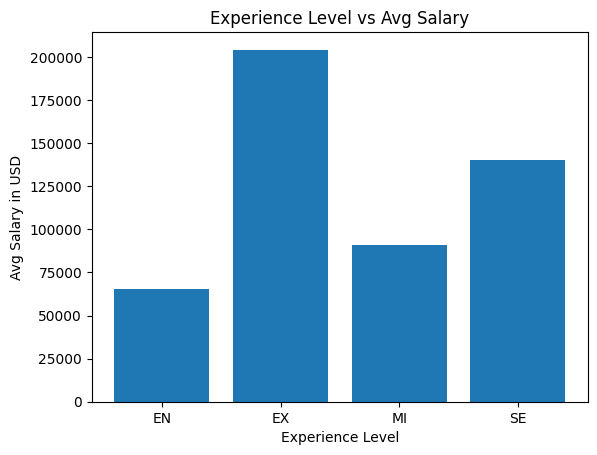

In [ ]:
avg_sal = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
print(avg_sal)
plt.bar(avg_sal['experience_level'], avg_sal['salary_in_usd'])
plt.xlabel("Experience Level")
plt.ylabel("Avg Salary in USD")
plt.title("Experience Level vs Avg Salary")
plt.show()

3. Impact of Company Size on Salary:
• Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

<ipython-input-7-6b85363f6822>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  company_size_salary = dataScientist.groupby('companySizeOrder')['salary_in_usd'].mean()


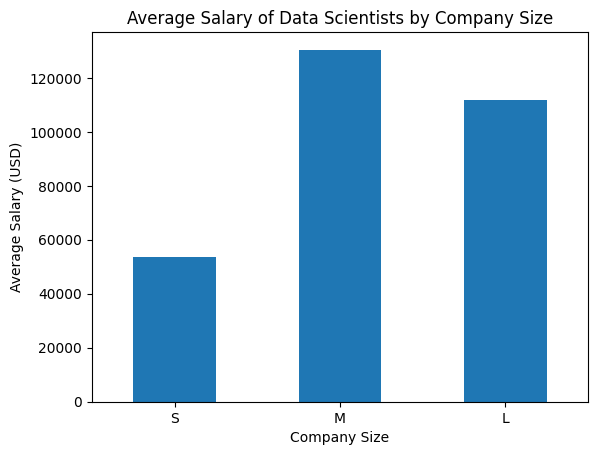

In [ ]:
dataScientist = df.loc[df['job_title'] == 'Data Scientist'].copy()
dataScientist['companySizeOrder'] = pd.Categorical(dataScientist['company_size'], categories=['S', 'M', 'L'], ordered=True)
company_size_salary = dataScientist.groupby('companySizeOrder')['salary_in_usd'].mean()

company_size_salary.plot(kind='bar')
plt.title('Average Salary of Data Scientists by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.show()



4. Job Title Analysis:
• Job titles can vary significantly. For this project, select a keyword or phrase to distinguish between different job titles. For instance, you can differentiate between job
titles containing the word ”Analyst” and those that do not. To achieve this, you may
find the str.contains function in Pandas helpful. Refer to this resource for examples:
https://www.geeksforgeeks.org/python-pandas-series-str-contains. Explore
various job titles to decide on the keyword or phrase you want to focus on

In [ ]:
job_titles = df['job_title'].unique().tolist()
jobs = pd.Series(job_titles)
jobs.index = [job_titles]
print(jobs.str.contains('Engineer'))

Data Scientist                              False
Machine Learning Scientist                  False
Big Data Engineer                            True
Product Data Analyst                        False
Machine Learning Engineer                    True
Data Analyst                                False
Lead Data Scientist                         False
Business Data Analyst                       False
Lead Data Engineer                           True
Lead Data Analyst                           False
Data Science Consultant                     False
Data Engineer                                True
BI Data Analyst                             False
Director of Data Science                    False
Research Scientist                          False
Machine Learning Manager                    False
Data Engineering Manager                     True
Machine Learning Infrastructure Engineer     True
ML Engineer                                  True
AI Scientist                                False


5. Interactions Between Relationships:
1
• Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

In [ ]:
def custom_ag(x):
  xp = {'EN':0,'EX':0,'MI':0, 'SI':0, 'SE':0}
  for i in x:
    if i == 'EN':
      xp['EN'] +=1
    elif i == 'EX':
      xp['EX'] +=1
    elif i == 'MI':
      xp['MI'] +=1
    elif i == 'SI':
      xp['SI'] +=1
    elif i == 'SE':
      xp['SE']+= 1
  return xp

pd.crosstab(df["job_title"],df["company_size"],values=df["experience_level"], aggfunc=custom_ag)

company_size,L,M,S
job_title,,,
3D Computer Vision Researcher,NaN,"{'EN': 0, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 0}",NaN
AI Scientist,"{'EN': 0, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 1}","{'EN': 1, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 0}","{'EN': 2, 'EX': 0, 'MI': 0, 'SI': 0, 'SE': 0}"
Analytics Engineer,NaN,"{'EN': 0, 'EX': 2, 'MI': 0, 'SI': 0, 'SE': 2}",NaN
Applied Data Scientist,"{'EN': 1, 'EX': 0, 'MI': 2, 'SI': 0, 'SE': 2}",NaN,NaN
Applied Machine Learning Scientist,"{'EN': 0, 'EX': 0, 'MI': 2, 'SI': 0, 'SE': 0}","{'EN': 1, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 0}",NaN
BI Data Analyst,"{'EN': 0, 'EX': 1, 'MI': 0, 'SI': 0, 'SE': 0}","{'EN': 0, 'EX': 0, 'MI': 2, 'SI': 0, 'SE': 0}","{'EN': 2, 'EX': 0, 'MI': 0, 'SI': 0, 'SE': 0}"
Big Data Architect,NaN,"{'EN': 0, 'EX': 0, 'MI': 0, 'SI': 0, 'SE': 1}",NaN
Big Data Engineer,"{'EN': 2, 'EX': 0, 'MI': 0, 'SI': 0, 'SE': 0}","{'EN': 0, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 1}","{'EN': 0, 'EX': 0, 'MI': 1, 'SI': 0, 'SE': 1}"
Business Data Analyst,"{'EN': 2, 'EX': 0, 'MI': 2, 'SI': 0, 'SE': 0}",NaN,NaN


6. Conclusion:
• Summarize your findings by listing all significant relationships you have discovered
during your analysis.

When comparing the employment type with average salary, it became aware that contract employees and full-time employees were paid more than the part time employees.

We found it interesting that the average salary at medium sized companies tends to be higher than that of large sized companies. We figured it is because at larger companies, the average salary is heavily weighted on the CEO and other top executives.